**Problem Set 5**

The einstein radius equation is as follows:
$R_{E}=\theta _{E}D_{\rm {S}}$, where $\theta _{E}=\left({\frac  {4GM}{c^{2}}}\;{\frac  {D_{{{\rm {LS}}}}}{D_{{{\rm {L}}}}D_{{{\rm {S}}}}}}\right)^{{1/2}}$. 

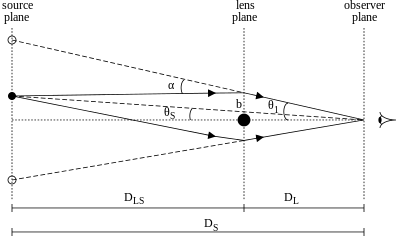

In [1]:
import matplotlib.pylab as plt
from matplotlib.path import Path
import matplotlib.patches as pat
import numpy as np
import requests
import IPython.display as Disp
url = 'https://upload.wikimedia.org/wikipedia/commons/thumb/6/6f/Gravitational_lens_geometry.svg/400px-Gravitational_lens_geometry.svg.png'
Disp.Image(requests.get(url).content)

For a single lens at the origin, the standard result is two images at the two quadratic solutions of the following equation:$\beta = \theta - \frac{D_{LS}}{D_s D_L}\frac{4GM}{c^2 \theta}$, where $\beta$ is the unlensed angular position. Now, given $\beta = \theta - \frac{\theta _E ^2}{\theta}$. This leads us to the quadratic solutions of $\theta ^2 - \beta \theta - \theta _E ^2$, which are $\theta_{1,2}=\frac{1}{2}\big[ \beta \pm (\beta ^2 + 4\theta _E ^2)^{\frac{1}{2}}\big]$. Note that $G\approx 4.302*10^{-3} \text{pc} M_{\odot}^{-1} (km/s)^2$, $c \approx 300,000 \frac{km}{s}$, and M is given in solar Masses. $D_{LS}$, $D_{S}$, and $D_{L}$ are given in the above image.

In [7]:
#Note that Dls, Dl, and Ds must be distance, given in parsecs
#Msol must be mass, given in solar masses
def calculate_einstein_angle(Dls, Dl, Ds, Msol):
    theta = np.sqrt((4*(4.302*10**-3)*Msol*Dls/(Dl*Ds*(300000**2))))
    return theta

def find_beta(x1,y1):
    beta = np.sqrt(x1**2 + y1**2)
    return beta

def calculate_theta_sol(einstein_angle, angular_position, sol_num):
    theta_1 = 0.5*(angular_position+np.sqrt((angular_position)**2+4*(einstein_angle**2)))
    theta_2 = 0.5*(angular_position-np.sqrt((angular_position)**2+4*(einstein_angle**2)))
    if sol_num == 1:
        return theta_1
    elif sol_num == 2:
        return theta_2
    else: 
        pass
    
def gravitational_lens(source, einstein_angle, sol_num, precision):
    idx_1 = np.asarray([item[0] for item in source])
    idx_2 = np.asarray([item[1] for item in source])
    beta = find_beta(idx_1, idx_2)
    if sol_num == 1:
        sol = calculate_theta_sol(einstein_angle, beta, 1)
        return (source * sol.reshape(precision, -1) / beta.reshape(precision, -1))
    elif sol_num == 2:
        sol = calculate_theta_sol(einstein_angle, beta, 2)
        return (source * sol.reshape(precision, -1) / beta.reshape(precision, -1))
    else: 
        pass

#Plots the origin, unlensed imaged, and lensed images.
#Discontinuity when unlensed image is over the origin, 
#but the problem doesn't have any that overlap, so
#i'll assume its fine. Note that Dl, Ds, and Dls must 
#be given in parsecs, and Msol must be given in solar
#masses, otherwise the function breaks down. Precision
#is a value that simply increases the smoothness of 
#the lensing. It's not very noticable unless you use
#a relatively small values. (loc is a placeholder for
#setting the title.)
def plot(Dl, Dls, Ds, Msol, x1, y1, loc, precision):
    fig, ax = plt.subplots(figsize=(15,15))
    einstein_angle = calculate_einstein_angle(Dls, Dl, Ds, Msol)
    t = np.linspace(0, 2*np.pi, precision)
    r = 5*10**-4
    sol1 = gravitational_lens(np.stack([x1 + r*np.cos(t), y1 + r*np.sin(t)], axis = 1), einstein_angle, 1, precision)
    sol2 = gravitational_lens(np.stack([x1 + r*np.cos(t), y1 + r*np.sin(t)], axis = 1), einstein_angle, 2, precision)
    ax.add_patch(pat.PathPatch(Path(sol1), color = 'yellowgreen', label = 'Lensed Solution 1'))
    ax.add_patch(pat.PathPatch(Path(sol2), color = 'limegreen', label = 'Lensed Solution 2'))
    ax.add_patch(pat.PathPatch(Path(np.stack([r*np.cos(t) + x1, r*np.sin(t) + y1], axis = -1)), 
                            color = 'palegreen', label = 'Unlensed Source'))
    ax.add_patch(pat.Circle((0, 0), radius = 0.5e-4, color='black', label = 'Center'))
    ax.add_patch(pat.Circle((0, 0), radius = einstein_angle, fill=None, linestyle='--', 
                            color = 'black', label = 'Einstein Radius'))
    ax.legend(loc="upper left", fontsize=15)
    ax.set_xlabel('θ (radians)', fontsize=25)
    ax.set_ylabel('θ (radians)', fontsize=25)
    ax.set_xlim(-2*einstein_angle, 2*einstein_angle)
    ax.set_ylim(-2*einstein_angle, 2*einstein_angle)
    #I know this implementation is bad, but I can't figure out how to set the title 
    #outside the function if I declare fig, ax inside a function. 
    if(loc == 'behind'):
        ax.set_title('Source Offset Almost Directly Behind Lens', fontsize=15)
    elif(loc == 'just inside'):
        ax.set_title('Source Offset Just Inside Einstein Radius of Lens', fontsize=15)
    elif(loc == 'just outside'):
        ax.set_title('Source Offset Just Outside Einstein Radius of Lens', fontsize=15)
    else:
        pass

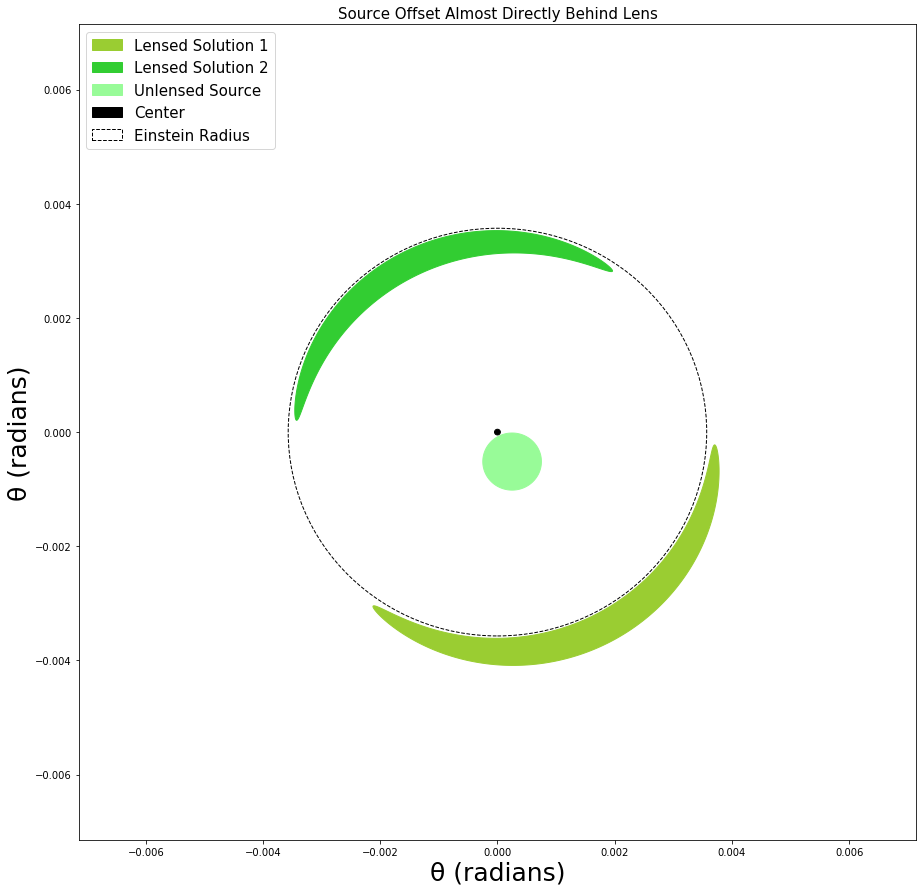

In [8]:
plot(1, 1, 1.5, 10**8, 2.5*10**-4, -5.16*10**-4, 'behind', 2500)

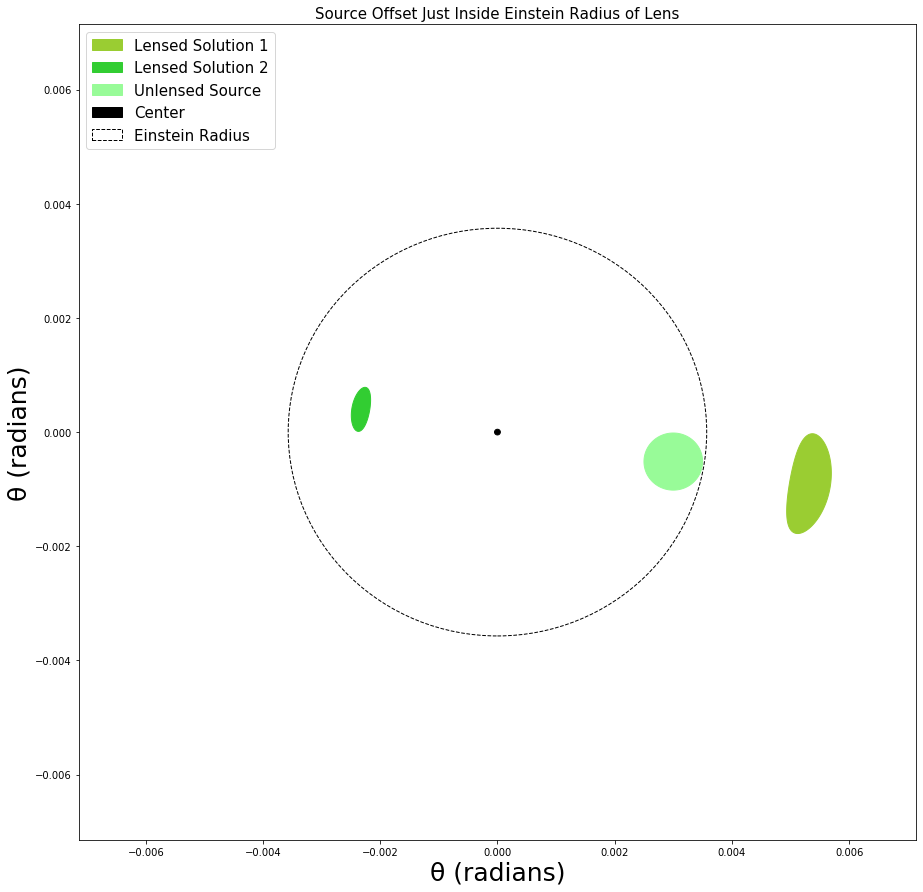

In [9]:
plot(1, 1, 1.5, 10**8, 3*10**-3, -5.16*10**-4, 'just inside', 2500)

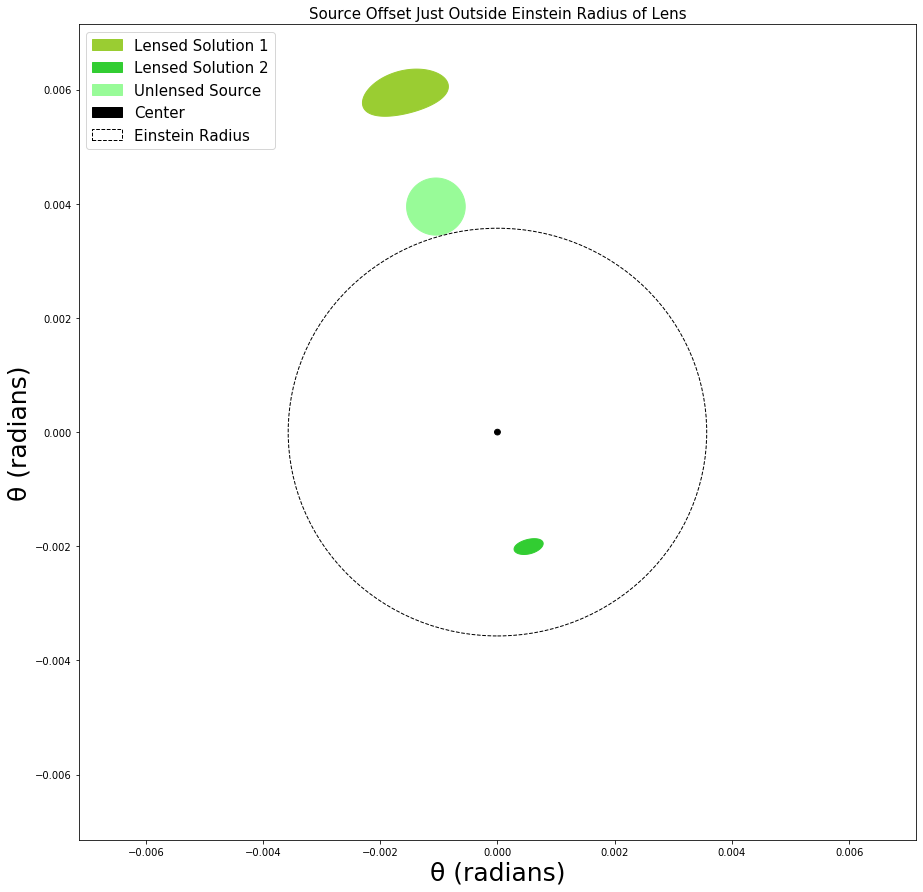

In [10]:
plot(1, 1, 1.5, 10**8,  -1.05*10**-3, 3.95*10**-3, 'just outside', 2500)